Step 1: Experiment with Different Values of the Regularization Parameter
C and the Kernel Coefficient
γ for SVM with RBF Kernel

In [ ]:
from sklearn.svm import SVC

# Define different values of C and gamma for experimentation
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

# Initialize models with various C and gamma values
models = {(C, gamma): SVC(kernel='rbf', C=C, gamma=gamma) for C in C_values for gamma in gamma_values}

models


{(0.1, 0.1): SVC(C=0.1, gamma=0.1),
 (0.1, 1): SVC(C=0.1, gamma=1),
 (0.1, 10): SVC(C=0.1, gamma=10),
 (1, 0.1): SVC(C=1, gamma=0.1),
 (1, 1): SVC(C=1, gamma=1),
 (1, 10): SVC(C=1, gamma=10),
 (10, 0.1): SVC(C=10, gamma=0.1),
 (10, 1): SVC(C=10, gamma=1),
 (10, 10): SVC(C=10, gamma=10)}

Step 2: Train SVM Models with Varying Values of
C and
γ

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization purposes.
y = iris.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different values of C and gamma for experimentation
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

# Initialize models with various C and gamma values
models = {(C, gamma): SVC(kernel='rbf', C=C, gamma=gamma) for C in C_values for gamma in gamma_values}

# Train each model
for (C, gamma), model in models.items():
    model.fit(X_train, y_train)

# Confirm models are trained
trained_models = {key: model for key, model in models.items()}
trained_models


{(0.1, 0.1): SVC(C=0.1, gamma=0.1),
 (0.1, 1): SVC(C=0.1, gamma=1),
 (0.1, 10): SVC(C=0.1, gamma=10),
 (1, 0.1): SVC(C=1, gamma=0.1),
 (1, 1): SVC(C=1, gamma=1),
 (1, 10): SVC(C=1, gamma=10),
 (10, 0.1): SVC(C=10, gamma=0.1),
 (10, 1): SVC(C=10, gamma=1),
 (10, 10): SVC(C=10, gamma=10)}

Step 3: Plot Decision Regions for Each Combination of
C and
γ

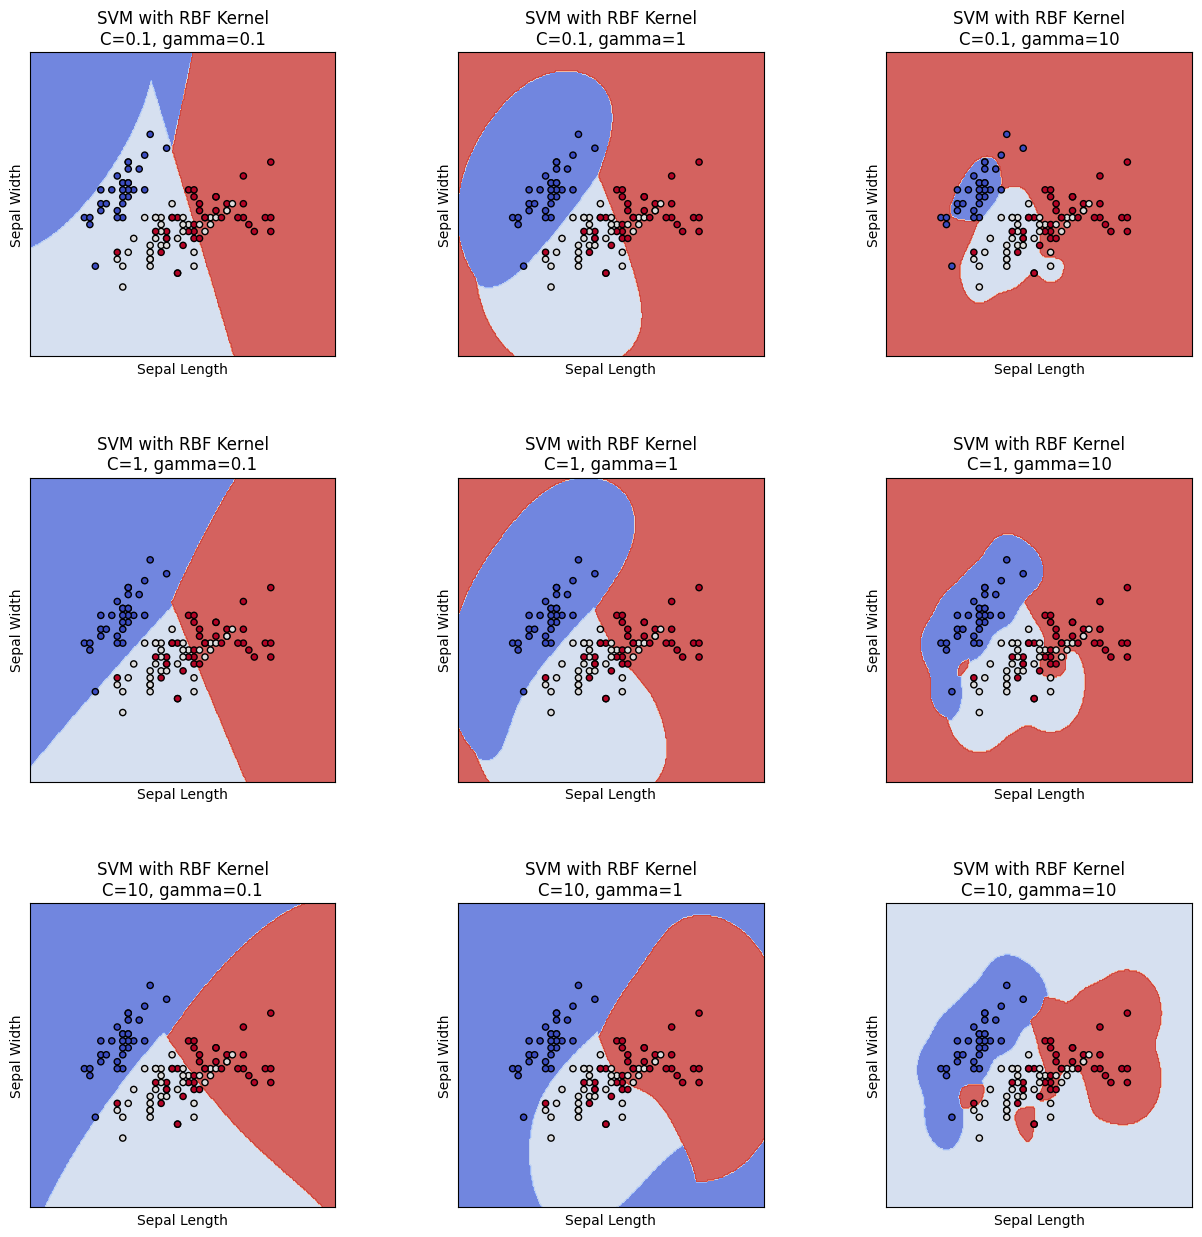

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create a mesh grid for plotting decision boundaries
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Function to plot decision contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Define different values of C and gamma for experimentation
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

# Assuming 'trained_models' is a dictionary containing the trained models
# and 'X_train', 'y_train' are the training data sets available from previous steps

# Initialize plot
fig, sub = plt.subplots(len(C_values), len(gamma_values), figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot decision regions for each model
for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        ax = sub[i][j]
        model = trained_models[(C, gamma)]
        xx, yy = make_meshgrid(X[:, 0], X[:, 1])
        plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal Length')
        ax.set_ylabel('Sepal Width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(f'SVM with RBF Kernel\nC={C}, gamma={gamma}')

plt.show()


Step 4: Evaluate the Models Based on Test Set Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate and display accuracy for each model
model_accuracies = {}
for (C, gamma), model in trained_models.items():
    accuracy = accuracy_score(y_test, model.predict(X_test))
    model_accuracies[(C, gamma)] = accuracy

model_accuracies


{(0.1, 0.1): 0.4222222222222222,
 (0.1, 1): 0.8,
 (0.1, 10): 0.6444444444444445,
 (1, 0.1): 0.8,
 (1, 1): 0.8,
 (1, 10): 0.8,
 (10, 0.1): 0.7777777777777778,
 (10, 1): 0.7777777777777778,
 (10, 10): 0.8}

Perform PCA on the Wine dataset to reduce its dimensionality and visualize the chemical composition data in a lower-dimensional space to see if it helps in differentiating wine types.

(0, array([0.36198848, 0.1920749 ]))

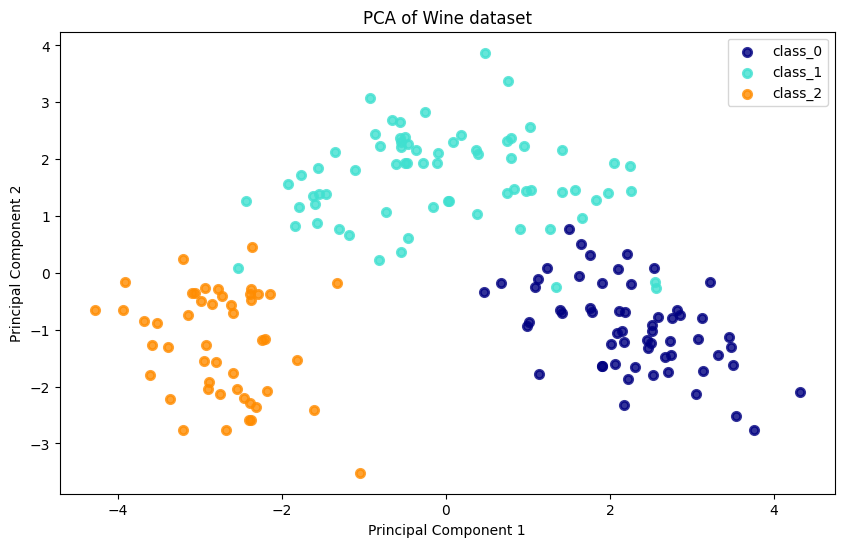

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Preprocess the Data
# Check for missing values
missing_values = np.isnan(X).sum()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Visualize the Results
plt.figure(figsize=(10, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], wine.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Wine dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Analyze
explained_variance = pca.explained_variance_ratio_

# Display missing values and explained variance
missing_values, explained_variance

